In [9]:
from google.colab import files
uploaded = files.upload()

Saving INGRES_state_level_data.txt to INGRES_state_level_data.txt


In [5]:
import pandas as pd
import json

In [10]:
import json
import pandas as pd

# Open and load full JSON array
with open("/content/INGRES_state_level_data.txt", "r") as f:
    data = json.load(f)   # data is now a list of dicts

# Flatten nested JSON into table
df = pd.json_normalize(data, sep="_")

# Show first few rows and columns
print(df.shape)




(33, 1588)
  locationName category coastalBusinessData waterDepletedZonesBusinessData  \
0     NAGALAND     None                None                           None   
1      MIZORAM     None                None                           None   

  streamRecharge additionalbaseflow envFlows subject action modifiable  ...  \
0           None               None     None    None   None       None  ...   
1           None               None     None    None   None       None  ...   

  reportSummary_5ff5533e-36c5-4c24-abff-1cbbea6f2bdf_BLOCK_safe  \
0                                                NaN              
1                                                NaN              

  reportSummary_6ad10263-20ad-4001-86c0-738be00ec03e_BLOCK_semi_critical  \
0                                                NaN                       
1                                                NaN                       

  reportSummary_6ad10263-20ad-4001-86c0-738be00ec03e_BLOCK_safe  \
0                 

In [11]:
df.head(5)

,locationName,category,coastalBusinessData,waterDepletedZonesBusinessData,streamRecharge,additionalbaseflow,envFlows,subject,action,modifiable,...,reportSummary_5ff5533e-36c5-4c24-abff-1cbbea6f2bdf_BLOCK_safe,reportSummary_6ad10263-20ad-4001-86c0-738be00ec03e_BLOCK_semi_critical,reportSummary_6ad10263-20ad-4001-86c0-738be00ec03e_BLOCK_safe,reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_over_exploited,reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_salinity,reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_semi_critical,reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_critical,reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_safe,reportSummary_200030a1-6d27-4dff-988a-e2104ff62ab8_BLOCK_semi_critical,reportSummary_200030a1-6d27-4dff-988a-e2104ff62ab8_BLOCK_safe
0,NAGALAND,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIZORAM,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARUNACHAL PRADESH,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BIHAR,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DAMAN AND DIU,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 1588 entries, locationName to reportSummary_200030a1-6d27-4dff-988a-e2104ff62ab8_BLOCK_safe
dtypes: float64(1560), object(28)
memory usage: 409.5+ KB


In [13]:
df.isna().sum()

,0
locationName,0
category,33
coastalBusinessData,33
waterDepletedZonesBusinessData,33
streamRecharge,33
...,...
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_semi_critical,32
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_critical,32
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_safe,32
reportSummary_200030a1-6d27-4dff-988a-e2104ff62ab8_BLOCK_semi_critical,32


In [14]:
# Separate categorical and numeric
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Impute categorical with 'Unknown'
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Impute numeric with median
for col in num_cols:
    df[col].fillna(0)

df.isna().sum()

,0
locationName,0
category,0
coastalBusinessData,0
waterDepletedZonesBusinessData,0
streamRecharge,0
...,...
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_semi_critical,32
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_critical,32
reportSummary_785cc6f0-e9d0-4961-9578-08ed2f24377a_BLOCK_safe,32
reportSummary_200030a1-6d27-4dff-988a-e2104ff62ab8_BLOCK_semi_critical,32


In [15]:
df = df.drop_duplicates()


In [16]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(r"[^a-z0-9_]", "", regex=True)


In [17]:
df.head()

,locationname,category,coastalbusinessdata,waterdepletedzonesbusinessdata,streamrecharge,additionalbaseflow,envflows,subject,action,modifiable,...,reportsummary_5ff5533e36c54c24abff1cbbea6f2bdf_block_safe,reportsummary_6ad1026320ad400186c0738be00ec03e_block_semi_critical,reportsummary_6ad1026320ad400186c0738be00ec03e_block_safe,reportsummary_785cc6f0e9d04961957808ed2f24377a_block_over_exploited,reportsummary_785cc6f0e9d04961957808ed2f24377a_block_salinity,reportsummary_785cc6f0e9d04961957808ed2f24377a_block_semi_critical,reportsummary_785cc6f0e9d04961957808ed2f24377a_block_critical,reportsummary_785cc6f0e9d04961957808ed2f24377a_block_safe,reportsummary_200030a16d274dff988ae2104ff62ab8_block_semi_critical,reportsummary_200030a16d274dff988ae2104ff62ab8_block_safe
0,NAGALAND,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIZORAM,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARUNACHAL PRADESH,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BIHAR,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DAMAN AND DIU,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.to_csv("cleaned_college_data.csv", index=False)

In [19]:
print("States:", df['locationname'].nunique())

States: 33


In [20]:
print("List of States:", df['locationname'].unique())

List of States: ['NAGALAND' 'MIZORAM' 'ARUNACHAL PRADESH' 'BIHAR' 'DAMAN AND DIU'
 'JAMMU AND KASHMIR' 'PUNJAB' 'MEGHALAYA' 'CHHATTISGARH' 'KERALA'
 'TRIPURA' 'WEST BENGAL' 'CHANDIGARH' 'PUDUCHERRY'
 'ANDAMAN AND NICOBAR ISLANDS' 'HARYANA' 'GOA' 'DADRA AND NAGAR HAVELI'
 'LAKSHDWEEP' 'SIKKIM' 'TELANGANA' 'KARNATAKA' 'HIMACHAL PRADESH' 'DELHI'
 'ASSAM' 'JHARKHAND' 'UTTARAKHAND' 'MANIPUR' 'TAMILNADU' 'RAJASTHAN'
 'GUJARAT' 'LADAKH' 'total']


<Figure size 1200x600 with 0 Axes>

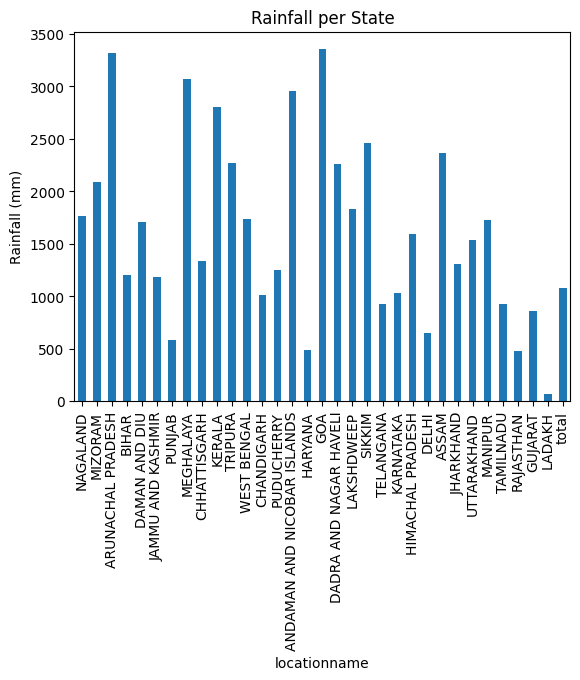

In [21]:
import matplotlib.pyplot as plt

# 1. Rainfall per state
plt.figure(figsize=(12,6))
df.plot(x="locationname", y="rainfall_total", kind="bar", legend=False)
plt.title("Rainfall per State")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

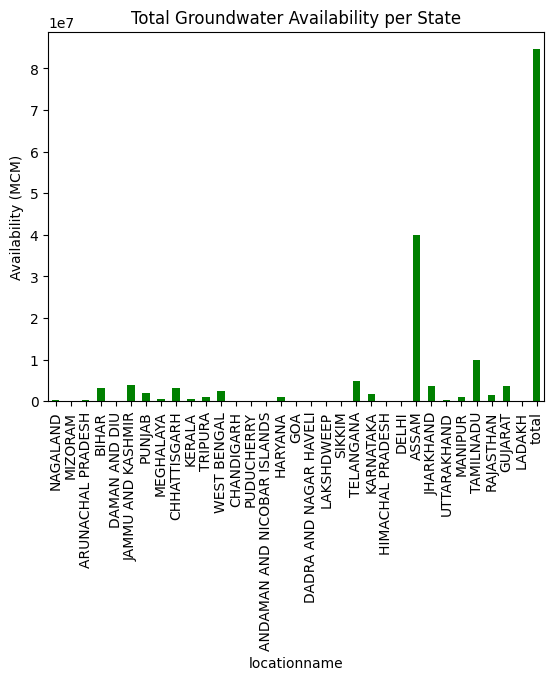

In [22]:
# 2. Groundwater Availability per State
plt.figure(figsize=(12,6))
df.plot(x="locationname", y="totalgwavailability_total", kind="bar", color="green", legend=False)
plt.title("Total Groundwater Availability per State")
plt.ylabel("Availability (MCM)")
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

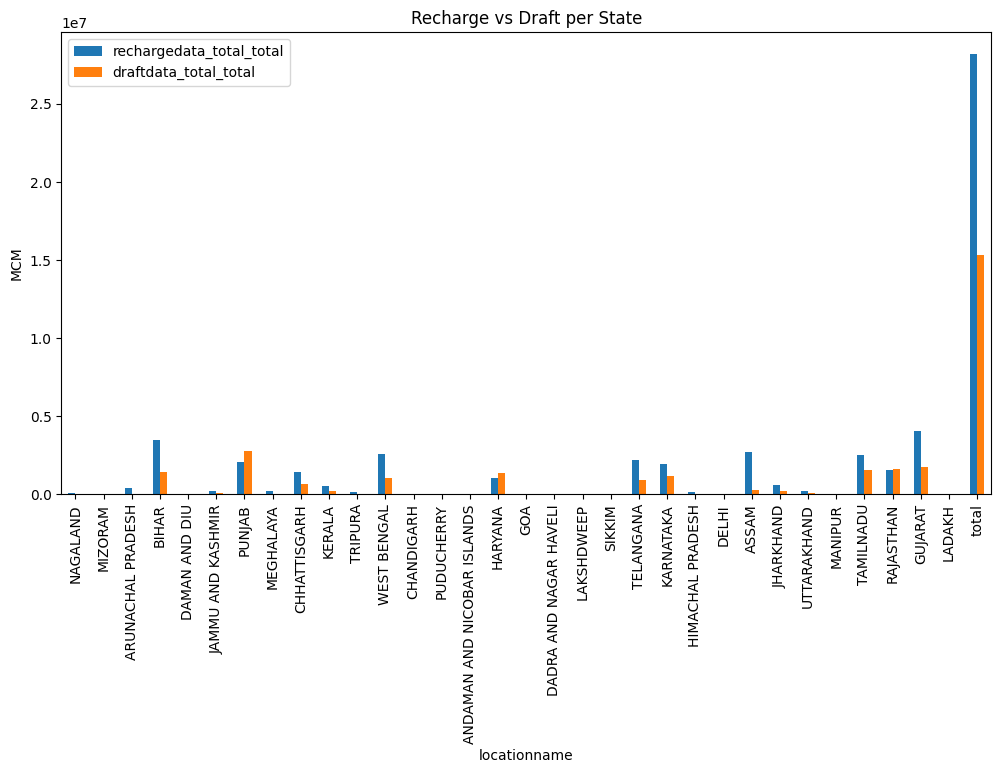

In [23]:
# 3. Recharge vs Draft (Water Balance)
plt.figure(figsize=(12,6))
df[['locationname','rechargedata_total_total','draftdata_total_total']].set_index("locationname").plot(kind="bar", figsize=(12,6))
plt.title("Recharge vs Draft per State")
plt.ylabel("MCM")
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

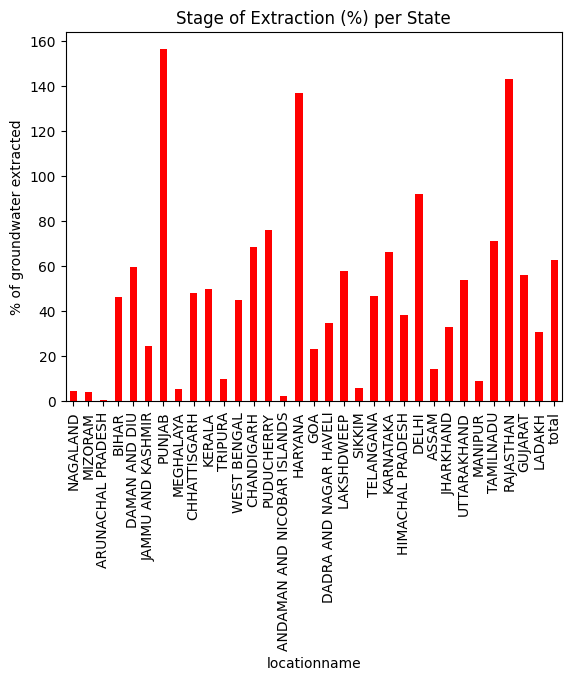

In [28]:
# 4. Stage of Extraction
plt.figure(figsize=(12,6))
df.plot(x="locationname", y="stageofextraction_total", kind="bar", color="red", legend=False)
plt.title("Stage of Extraction (%) per State")
plt.ylabel("% of groundwater extracted")
plt.xticks(rotation=90)
plt.show()

# 🌊 Insights from State-Level Groundwater Data

### ☔ Rainfall
- Identifies which states receive the **highest vs. lowest rainfall**.  
- Useful for linking **rainfall patterns with groundwater recharge**.  

### 💧 Groundwater Availability
- Shows which states have **larger groundwater reserves**.  
- Helps policymakers prioritize **allocation & water budgeting**.  

### 📊 Recharge vs Draft
- **Recharge = Income** (water added to aquifers through rainfall/river infiltration).  
- **Draft = Expenditure** (water extracted for irrigation, domestic, industry).  
- If **Recharge > Draft** → state is sustainable ✅.  
- If **Recharge < Draft** → state is in **deficit / over-exploited ❌**.  

### 🚨 Stage of Extraction
- Ratio = `(Draft ÷ Recharge) × 100`.  
- Classification of states:
  - **Safe** → <70%  
  - **Semi-Critical** → 70–90%  
  - **Critical** → 90–100%  
  - **Over-Exploited** → >100%  
- Helps identify **groundwater stress hotspots**.  





<Figure size 1200x600 with 0 Axes>

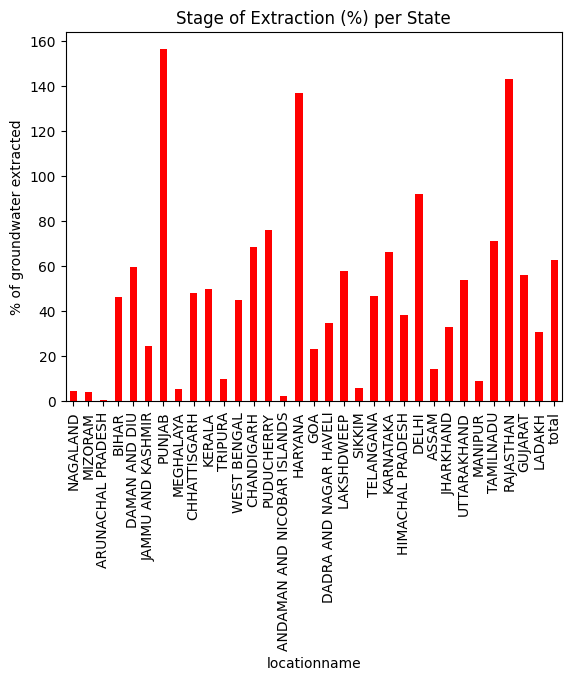

In [24]:
# 4. Stage of Extraction
plt.figure(figsize=(12,6))
df.plot(x="locationname", y="stageofextraction_total", kind="bar", color="red", legend=False)
plt.title("Stage of Extraction (%) per State")
plt.ylabel("% of groundwater extracted")
plt.xticks(rotation=90)
plt.show()